In [1]:
cd ..

/home/mscs/congfeng4/Graph-CVAE


/public/congfeng4/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [ ]:
from dataset import QuantumCircuitDataset
import tempfile

dataset = QuantumCircuitDataset(
    tempfile.mkdtemp('quantum'),
    base_num_samples=100,
    num_qubits=10,
    max_depth=100,
    regenerate=True,
    n_jobs=-1,
)

Transpile参数组合数：13

=== 开始生成数据集 ===
基础样本数：100 | 拓扑类型：['linear', 'star', 'grid', 'ring', 'random'] | 总样本数：6500
比特数：10 | 门类型：['h', 'x', 'z', 't', 's', 'cx', 'swap'] | 最大电路深度：100


100%|██████████| 100/100 [01:14<00:00,  1.34it/s]
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
/public/congfeng4/miniconda3/envs/py39/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:4625: UserWarning: Trying to add QuantumRegister to a QuantumCircuit having a layout
  circ.add_register(qreg)
/public/congfeng4/miniconda3/envs/py39/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:4625: UserWarning: Trying to add QuantumRegister to a QuantumCircuit having a layout
  circ.add_register(qreg)
/public/congfeng4/miniconda3/envs/py39/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:4625: UserWarning: Trying to add QuantumRegister to a QuantumCircuit having a layout
  circ.add_register(qreg)
/public/congfeng4/miniconda3/envs/py39/lib/python3.9/site-packages/qiskit/circuit/quantumcircuit.py:4625: UserWarning: Trying to add QuantumRegister to a QuantumCircuit having a layout
  circ.add_register(qreg)
/public/congfeng4/miniconda3/e

In [ ]:
len(dataset)

260

In [ ]:
dataset[3]

{'g': Data(edge_index=[2, 147], x=[98, 17]),
 't': Data(edge_index=[2, 18], x=[10, 10]),
 'g_star': Data(edge_index=[2, 191], x=[131, 17]),
 'quantum_origin': {'statevector': tensor([0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'unitary': tensor([[0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          ...,
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]])},
 'quantum_optimized': {'statevector': tensor([0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j]),
  'unitary': tensor([[0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j,  ..., 0.+0.j, 0.+0.j, 0.+0.j],
          ...,
          

## Visualize g, g* (optimzed g).

In [ ]:
all_samples = [dataset[i] for i in range(len(dataset))]
all_samples.sort(key=lambda x: x['optimization_metrics']['depth_ratio'])


In [ ]:

sample = all_samples[9]
g, g_star, t = sample['g'], sample['g_star'], sample['t']

In [ ]:
g_star.edge_index

tensor([[ 2,  3,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14,  0, 16, 16, 19, 17, 21,
         22, 23, 24, 24, 26, 27, 28, 21, 30, 31],
        [ 3,  4,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22,
         23, 24, 25, 26, 27, 28, 29, 30, 31, 32]])

In [ ]:
from converter import data_to_quantum_circuit

g_qc = data_to_quantum_circuit(g, dataset.num_qubits, dataset.basic_gates)
g_star_qc = data_to_quantum_circuit(g_star, dataset.num_qubits, dataset.basic_gates)

In [ ]:
g_qc.draw()

┌───┐                                                         ┌───┐»
q_0: ──X──┤ Z ├────────────X─────────■─────────■───X───────X──────────X─┤ T ├»
       │  └───┘            │         │         │   │       │    ┌───┐ │ ├───┤»
q_1: ──┼───────────────────┼─────────┼─────────┼───┼───────┼──X─┤ Z ├─┼─┤ T ├»
       │       ┌───┐       │         │         │   │       │  │ └───┘ │ └───┘»
q_2: ──┼────■──┤ H ├───────┼─────────┼─────────┼───┼───────┼──┼───────┼──────»
       │    │  └───┘       │  ┌───┐  │  ┌───┐  │   │       │  │       │      »
q_3: ──┼────┼─────────■────┼──┤ S ├──┼──┤ X ├──┼───┼───────┼──┼───────┼──────»
       │    │         │    │  └───┘  │  └───┘  │   │ ┌───┐ │  │ ┌───┐ │      »
q_4: ──┼────┼─────────┼────X─────────┼─────────┼───X─┤ T ├─┼──┼─┤ S ├─┼──────»
       │    │  ┌───┐  │  ┌───┐       │         │     └───┘ │  │ └───┘ │      »
q_5: ──┼────┼──┤ S ├──┼──┤ X ├───────┼─────────┼───────────X──┼───■───┼───X──»
       │    │  └───┘┌─┴─┐├───┤       │         │              │   │   │   │  »
q_6: ──X────┼───────┤ X ├┤ S ├───────┼─────────┼──────────────┼───┼───┼───X──»
     ┌───┐  │       ├───┤└───┘       │         │              │   │   │      »
q_7: ┤ H ├──┼────X──┤ S ├────────────┼─────────┼──────────────┼───┼───┼──────»
     └───┘┌─┴─┐  │  ├───┤          ┌─┴─┐     ┌─┴─┐            │ ┌─┴─┐ │ ┌───┐»
q_8: ─────┤ X ├──┼──┤ T ├──────────┤ X ├─────┤ X ├─X──────────X─┤ X ├─┼─┤ Z ├»
          └───┘  │  ├───┤          └───┘     └───┘ │ ┌───┐      └───┘ │ └───┘»
q_9: ────────────X──┤ H ├──────────────────────────X─┤ H ├────────────X──────»
                    └───┘                            └───┘                   »
«             
«q_0: ─X──────
«      │      
«q_1: ─┼──────
«      │ ┌───┐
«q_2: ─X─┤ H ├
«        └───┘
«q_3: ────────
«             
«q_4: ────────
«             
«q_5: ────────
«             
«q_6: ────────
«             
«q_7: ────────
«             
«q_8: ────────
«             
«q_9: ────────
«

In [ ]:
g_star_qc.draw()

┌───┐┌───┐┌───┐                    
q_0: ───────────────────────────■──┤ Z ├┤ X ├┤ S ├────────────────────
     ┌───┐┌───┐                 │  └───┘└───┘└───┘                    
q_1: ┤ S ├┤ T ├─────────────────┼─────────────────────────────────────
     └───┘└───┘┌───┐            │                                     
q_2: ───────■──┤ Z ├────────────┼─────────────────────────────────────
     ┌───┐  │  ├───┤┌───┐┌───┐  │  ┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐┌───┐
q_3: ┤ S ├──┼──┤ S ├┤ S ├┤ S ├──┼──┤ S ├┤ S ├┤ S ├┤ S ├┤ S ├┤ S ├┤ T ├
     └───┘  │  └───┘└───┘└───┘  │  └───┘└───┘└───┘└───┘└───┘└───┘└───┘
q_4: ───────┼───────────────────┼─────────X───────────────────────────
            │                   │         │                           
q_5: ───────┼─────────X─────────┼─────────┼───────────────────────────
            │         │         │         │       ┌───┐┌───┐┌───┐┌───┐
q_6: ───────┼─────────┼─────────┼─────────┼────■──┤ T ├┤ H ├┤ T ├┤ H ├
     ┌───┐  │  ┌───┐  │  ┌───┐  │         │    │  └───┘└───┘└───┘└───┘
q_7: ┤ Z ├──┼──┤ X ├──┼──┤ S ├──┼─────────┼────┼──────────────────────
     ├───┤  │  └───┘  │  └───┘  │         │    │                      
q_8: ┤ S ├──┼─────────┼─────────┼─────────┼────┼──────────────────────
     ├───┤┌─┴─┐       │       ┌─┴─┐┌───┐  │  ┌─┴─┐┌───┐               
q_9: ┤ Z ├┤ X ├───────X───────┤ X ├┤ S ├──X──┤ X ├┤ H ├───────────────
     └───┘└───┘               └───┘└───┘     └───┘└───┘

In [ ]:
sample['optimization_metrics']

{'depth_ratio': 1.0, 'total_gate_ratio': 0.9706, 'two_qubit_ratio': 0.3333}

In [ ]:
sample['meta']

{'base_idx': 2,
 'topo_type': 1,
 'layout_method': 2,
 'routing_method': 1,
 'optimization_level': 2}

In [ ]:
origin_um = sample['quantum_origin']['unitary'].numpy()
optimized_um = sample['quantum_optimized']['unitary'].numpy()

In [ ]:
optimized_um.shape, origin_um.shape

((1024, 1024), (1024, 1024))

## Visualize topo.

In [ ]:
topo_data = sample['t']
topo_data

Data(edge_index=[2, 18], x=[10, 10])

In [ ]:
from torch_geometric.utils import to_networkx

topo_g = to_networkx(topo_data, to_undirected=True)
topo_g.number_of_edges(), topo_g.number_of_nodes()

(9, 10)

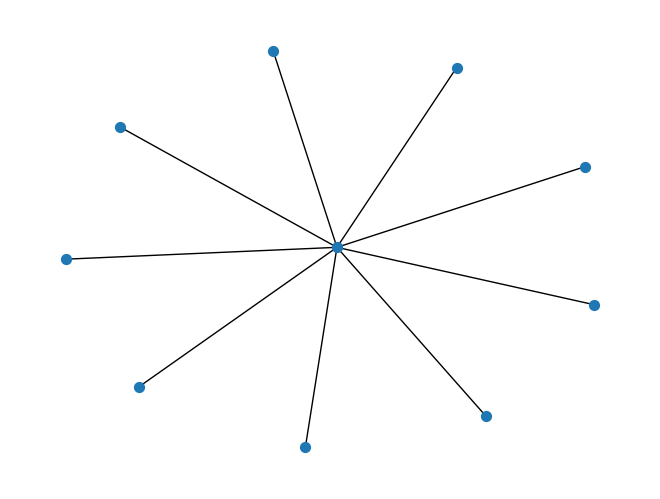

In [ ]:
import networkx as nx

nx.draw(topo_g, node_size=50) # 2x5 grid

## Statistic of the dataset.

In [ ]:

from dataset_stats import extract_scalars_to_dataframe

In [ ]:
df = extract_scalars_to_dataframe(dataset)

In [ ]:
df

,sample_idx,base_idx,topo_type,layout_method,routing_method,optimization_level,origin_num_qubits,origin_total_gates,origin_depth,origin_two_qubit_gates,opt_num_qubits,opt_total_gates,opt_depth,opt_two_qubit_gates,depth_ratio,total_gate_ratio,two_qubit_ratio
0,0,0,linear,trivial,basic,1,10,98,32,62,10,350,261,223,8.1562,3.5714,3.5968
1,1,0,linear,trivial,basic,2,10,98,32,62,10,152,92,94,2.8750,1.5510,1.5161
2,2,0,linear,trivial,sabre,1,10,98,32,62,10,303,175,164,5.4688,3.0918,2.6452
3,3,0,linear,trivial,sabre,2,10,98,32,62,10,131,67,73,2.0938,1.3367,1.1774
4,4,0,linear,dense,basic,1,10,98,32,62,10,312,213,221,6.6562,3.1837,3.5645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,255,4,ring,sabre,basic,1,10,13,6,9,10,16,8,12,1.3333,1.2308,1.3333
256,256,4,ring,sabre,basic,2,10,13,6,9,10,10,6,6,1.0000,0.7692,0.6667
257,257,4,ring,sabre,sabre,0,10,13,6,9,10,16,8,12,1.3333,1.2308,1.3333
258,258,4,ring,sabre,sabre,1,10,13,6,9,10,16,9,12,1.5000,1.2308,1.3333


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


<Axes: xlabel='optimization_level', ylabel='depth_ratio'>

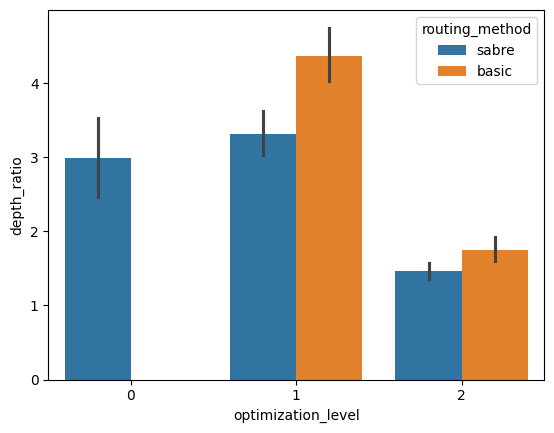

In [ ]:
sns.barplot(df, x='optimization_level', y='depth_ratio', hue='routing_method')

<Axes: xlabel='optimization_level', ylabel='depth_ratio'>

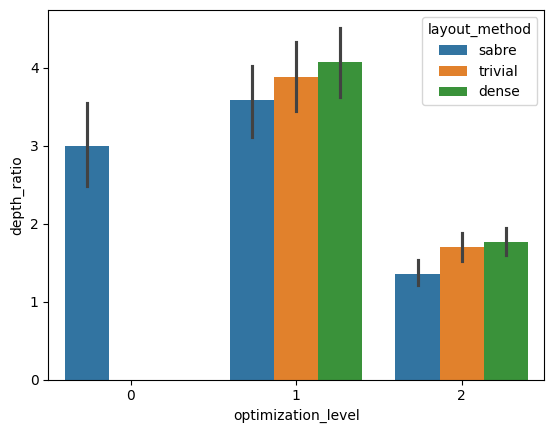

In [ ]:
sns.barplot(df, x='optimization_level', y='depth_ratio', hue='layout_method')


<Axes: xlabel='total_gate_ratio', ylabel='optimization_level'>

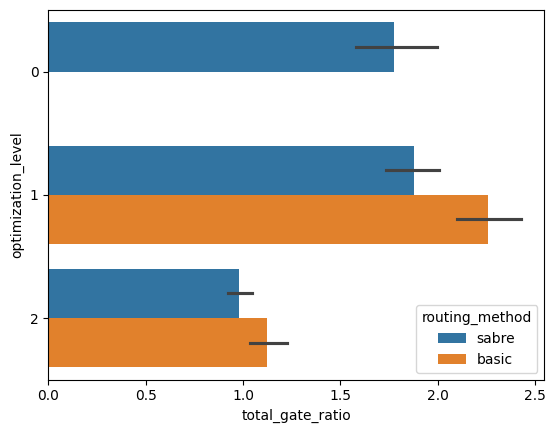

In [ ]:
sns.barplot(df, x='total_gate_ratio', y='optimization_level', hue='routing_method', orient='h')


<Axes: xlabel='total_gate_ratio', ylabel='optimization_level'>

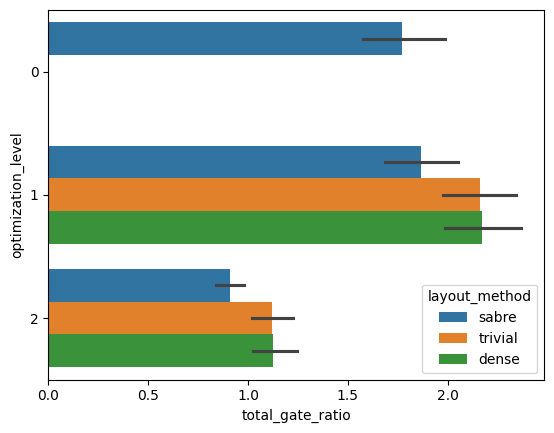

In [ ]:
sns.barplot(df, x='total_gate_ratio', y='optimization_level', hue='layout_method', orient='h')


<Axes: xlabel='total_gate_ratio', ylabel='optimization_level'>

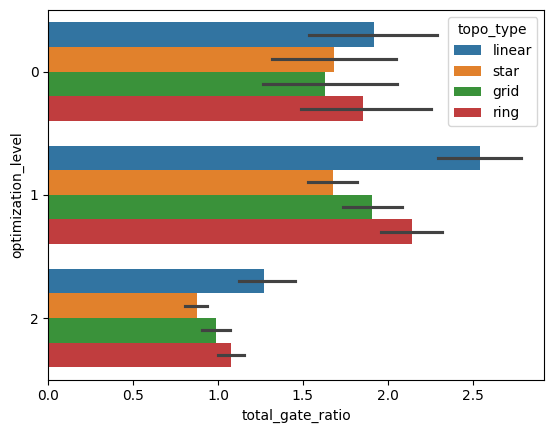

In [ ]:
sns.barplot(df, x='total_gate_ratio', y='optimization_level', hue='topo_type', orient='h')


<Axes: xlabel='depth_ratio', ylabel='optimization_level'>

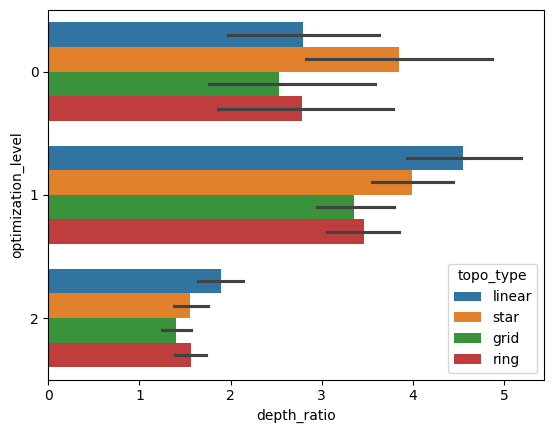

In [ ]:
sns.barplot(df, x='depth_ratio', y='optimization_level', hue='topo_type', orient='h')


## Use with DataLoader

We don't need custom collate_fn!! Also `num_workers` is supported!

In [ ]:
from dataset import DataLoader

dataloader = DataLoader(dataset, batch_size=8, shuffle=True, num_workers=4)

In [ ]:
batch_data = next(iter(dataloader))

In [ ]:
batch_data['quantum_optimized']['unitary'].shape

torch.Size([8, 1024, 1024])

In [ ]:
batch_data['g'].num_graphs

8

In [ ]:
dataloader.num_workers

4